In [1]:
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
#import pingouin
from datetime import datetime
from matplotlib.pyplot import figure


In [2]:
zrent = pd.read_csv("./data/clean/zrentals.csv")

zrent["zip_code"] = zrent["zip_code"].apply(int)
zrent["date"] = pd.to_datetime(zrent["date"])
zrent["borough"] = zrent["borough"].apply(str)
zrent["city"] = zrent["city"].apply(str)
zrent["mean_rent"] = zrent["mean_rent"].apply(int)
zrent

FileNotFoundError: [Errno 2] No such file or directory: './data/clean/zrentals.csv'

In [ ]:
trulia = pd.read_csv("./data/clean/trulia_test.csv")
trulia = trulia.rename(columns={"County": "borough", "Address": "address", "Zip":"zip_code",
                                "Listing Url": "listing_url"})
trulia["zip_code"] = zrent["zip_code"].apply(int)
trulia["borough"] = zrent["borough"].apply(str)
trulia["price"] = trulia["price"].dropna()
#trulia["address"] = zrent["address"].apply(str)


trulia

,address,borough,zip_code,price,listing_url,Borough
0,"2600 Netherland Ave Bronx, NY 10463",QUEENS,11385,2245.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
1,"2600 Netherland Ave Bronx, NY 10463",BRONX,10467,2600.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
2,"2600 Netherland Ave Bronx, NY 10463",BROOKLYN,11226,3675.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
3,"939 Woodycrest Ave Bronx, NY 10452",BROOKLYN,11220,1581.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
4,"939 Woodycrest Ave Bronx, NY 10452",BROOKLYN,11207,1904.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
...,...,...,...,...,...,...
3971,"12-07 Jackson Ave #2F Long Island City, NY 11101",MANHATTAN,10028,NaN,https://www.trulia.com/p/ny/long-island-city/1...,Queens
3972,"11123 76th Rd #D8 Forest Hills, NY 11375",BROOKLYN,11228,NaN,https://www.trulia.com/p/ny/forest-hills/11123...,Queens
3973,"3069 34th St #3A Astoria, NY 11103",BROOKLYN,11205,NaN,https://www.trulia.com/p/ny/astoria/3069-34th-...,Queens
3974,"125 W 31st St #48F New York, NY 10001",MANHATTAN,10040,NaN,https://www.trulia.com/p/ny/new-york/125-w-31s...,New York


In [ ]:
columns_to_keep1 = ["zip_code","mean_rent","borough","date"]
columns_to_keep2 = ["zip_code","price","borough"]
# Merge the DataFrames and drop unnecessary columns
zillow_trulia = pd.merge(zrent[columns_to_keep1], trulia[columns_to_keep2], on=["zip_code","borough"])
zillow_trulia = zillow_trulia.dropna()

In [ ]:
zillow_trulia

,zip_code,mean_rent,borough,date,price
0,11385,2216,QUEENS,2015-03-31,2245.0
1,11385,2216,QUEENS,2015-03-31,2585.0
2,11385,2216,QUEENS,2015-03-31,6188.0
3,11385,2216,QUEENS,2015-03-31,5745.0
4,11385,2216,QUEENS,2015-03-31,3245.0
...,...,...,...,...,...
352492,10314,1998,STATEN_ISLAND,2022-06-30,3868.0
352525,10314,2016,STATEN_ISLAND,2022-07-31,3868.0
352558,10314,2003,STATEN_ISLAND,2022-08-31,3868.0
352591,10314,2088,STATEN_ISLAND,2022-09-30,3868.0


Text(0.5, 1.0, 'Average Rent from Trulia and Zillow by Zip Code')

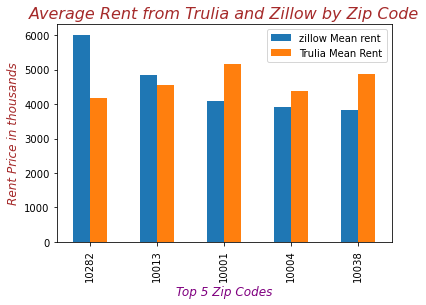

In [ ]:


avg_prices = zillow_trulia.groupby(["zip_code"])[["mean_rent", "price"]].mean()
avg_prices["mean_rent"] = avg_prices["mean_rent"].apply(int)
avg_prices = avg_prices.dropna()
# Sort the DataFrame by the mean rent in descending order
avg_prices = avg_prices.sort_values(by="mean_rent", ascending=False)
avg_prices = avg_prices.sort_values(by="mean_rent", ascending=False)

# Select the top 5 zip codes
top_5 = avg_prices.head(5)

# Create a bar chart comparing the mean rent and home value for the top 5 zip codes
top_5.plot.bar(y = ["mean_rent", "price"])

plt.legend(["zillow Mean rent", "Trulia Mean Rent"])

plt.xlabel("Top 5 Zip Codes", fontsize=12, fontstyle="italic", color="purple")
plt.ylabel("Rent Price in thousands", fontsize=12, fontstyle='italic', color="brown")
plt.title("Average Rent from Trulia and Zillow by Zip Code", fontsize=16, fontstyle="italic", color="brown")

In [ ]:
df1 = zrent["mean_rent"].sort_values(ascending =False)
df1

8591    7976
8453    7973
8188    7897
8320    7843
8731    7836
        ... 
427     1272
510     1262
261     1259
179     1254
1001    1134
Name: mean_rent, Length: 8736, dtype: int64

In [ ]:
df2 = trulia["price"].sort_values(ascending =False)
df2

281     13765.0
280     13590.0
187     13132.0
534     12952.0
320     12895.0
         ...   
3971        NaN
3972        NaN
3973        NaN
3974        NaN
3975        NaN
Name: price, Length: 3976, dtype: float64

In [ ]:
zrent.groupby(["zip_code"]).count()["mean_rent"].sort_values(ascending=False).head(5)

zip_code
10001    92
11228    92
10463    92
10462    92
10461    92
Name: mean_rent, dtype: int64

/var/folders/2r/0fj15shj34z2mbldl18cp9kc0000gp/T/ipykernel_84118/437514740.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(mean_rent_1.index, rotation=45)
/var/folders/2r/0fj15shj34z2mbldl18cp9kc0000gp/T/ipykernel_84118/437514740.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(mean_rent_2.index, rotation=45)


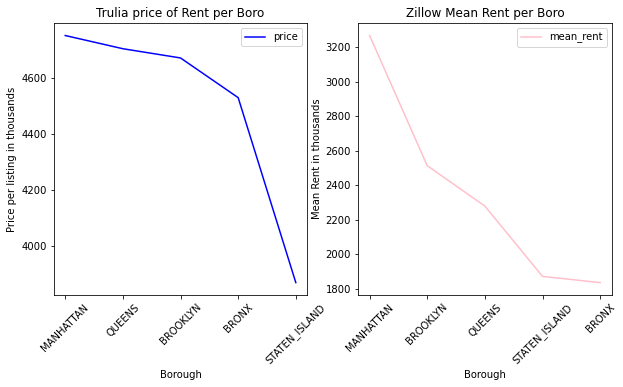

In [ ]:
# Calculate the mean rent and price for each data frame
mean_rent_1 = trulia.groupby('borough')['price'].mean()
mean_price_1 = trulia.groupby('borough')['price'].mean()
mean_rent_2 = zrent.groupby('borough')['mean_rent'].mean()
mean_price_2 = zrent.groupby('borough')['mean_rent'].mean()

# Sort the mean rent and price in descending order
mean_rent_1 = mean_rent_1.sort_values(ascending=False)
mean_price_1 = mean_price_1.sort_values(ascending=False)
mean_rent_2 = mean_rent_2.sort_values(ascending=False)
mean_price_2 = mean_price_2.sort_values(ascending=False)

# Plot the mean rent and price for each data frame on separate graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(mean_price_1, 'b', label='price')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Price per listing in thousands')
ax1.set_title('Trulia price of Rent per Boro')
ax1.legend()
ax1.set_xticklabels(mean_rent_1.index, rotation=45)

ax2.plot(mean_price_2, 'pink', label='mean_rent')
ax2.set_xlabel('Borough')
ax2.set_ylabel('Mean Rent in thousands')
ax2.set_title('Zillow Mean Rent per Boro')
ax2.legend()
ax2.set_xticklabels(mean_rent_2.index, rotation=45)
plt.show()


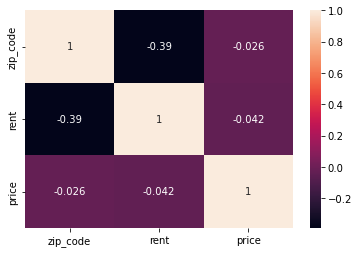

In [ ]:
mean_rent = zrent.groupby(['borough','zip_code'])['mean_rent'].mean()
mean_price = trulia.groupby(['borough','zip_code'])['price'].mean()

# Create a new DataFrame with the borough, zip code, and mean rent and price
data = pd.DataFrame({'borough': mean_rent.index.get_level_values(0), 
                     'zip_code': mean_rent.index.get_level_values(1), 
                     'rent': mean_rent, 
                     'price': mean_price})

# Create the correlation heat map
sns.heatmap(data.corr(), annot=True)

# Show the plot
plt.show()

# Pivot the DataFrame to create a matrix with the boroughs and zip codes as rows and columns


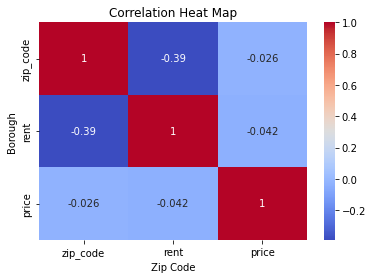

In [ ]:
mean_rent = zrent.groupby(['borough', 'zip_code'])['mean_rent'].mean()
mean_price = trulia.groupby(['borough', 'zip_code'])['price'].mean()

# Create a new DataFrame with the borough, zip code, and mean rent and price
data = pd.DataFrame({'borough': mean_rent.index.get_level_values(0), 
                     'zip_code': mean_rent.index.get_level_values(1), 
                     'rent': mean_rent, 
                     'price': mean_price})

# Pivot the DataFrame to create a matrix with the boroughs and zip codes as rows and columns
#pivoted = data.pivot_table(index=['borough', 'zip_code'], columns=['zip_code', 'borough'], values=['rent', 'price'])

# Create the correlation heat map
sns.heatmap(data.corr(),cmap = 'coolwarm', annot=True)

# Add a title and labels to the plot
plt.title('Correlation Heat Map')
plt.xlabel('Zip Code')
plt.ylabel('Borough')

# Show the plot
plt.show()



In [ ]:
#zrent_max = zrent.groupby(["zip_code"] == "10007").max() 

zrent[zrent["zip_code"] == 10007].groupby("zip_code").count() 




,state,city,borough,date,mean_rent
zip_code,,,,,
10007,70,70,70,70,70


Text(0.5, 1.0, 'Average Rent from Trulia and Zillow by Zip Code')

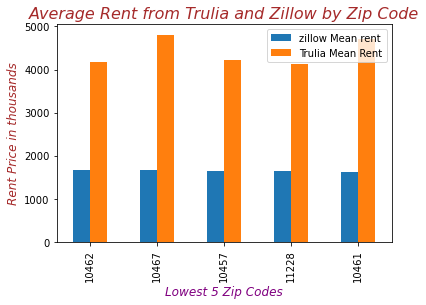

In [ ]:
avg_prices = avg_prices.sort_values(by="mean_rent", ascending=False)

# Select the top 5 zip codes
last_5 = avg_prices.tail(5)

last_5.plot.bar(y = ["mean_rent", "price"])

plt.legend(["zillow Mean rent", "Trulia Mean Rent"])

plt.xlabel("Lowest 5 Zip Codes", fontsize=12, fontstyle="italic", color="purple")
plt.ylabel("Rent Price in thousands", fontsize=12, fontstyle='italic', color="brown")
plt.title("Average Rent from Trulia and Zillow by Zip Code", fontsize=16, fontstyle="italic", color="brown")